In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV


In [2]:
tobdata= pd.read_csv("Tobacco use -1969-2010.csv")

In [3]:
print(tobdata)

       YEAR LocationAbbr LocationDesc                       TopicDesc  \
0      2010           AL      Alabama              Cessation (Adults)   
1      2010           AL      Alabama          Cigarette Use (Adults)   
2      2010           AL      Alabama          Cigarette Use (Adults)   
3      2010           AL      Alabama          Cigarette Use (Adults)   
4      2010           AL      Alabama          Cigarette Use (Adults)   
...     ...          ...          ...                             ...   
38045  1996           WY      Wyoming  Cigarette Consumption (Adults)   
38046  1996           WY      Wyoming  Cigarette Consumption (Adults)   
38047  1996           WY      Wyoming  Cigarette Consumption (Adults)   
38048  1996           WY      Wyoming  Cigarette Consumption (Adults)   
38049  1996           WY      Wyoming              Cessation (Adults)   

              MeasureDesc  Data_Value(%)  Sample_Size  Gender       Race  \
0            Quit Smoking           53.3       

In [4]:
tobdata.head()

,YEAR,LocationAbbr,LocationDesc,TopicDesc,MeasureDesc,Data_Value(%),Sample_Size,Gender,Race,Age,Education,DataSource
0,2010,AL,Alabama,Cessation (Adults),Quit Smoking,53.3,659.0,Female,All Races,All Ages,All Grades,BRFSS
1,2010,AL,Alabama,Cigarette Use (Adults),Occasional smoker,18.7,5234.0,Female,All Races,All Ages,All Grades,BRFSS
2,2010,AL,Alabama,Cigarette Use (Adults),Occasional smoker,18.6,1197.0,Female,All Races,18 to 44 Years,All Grades,BRFSS
3,2010,AL,Alabama,Cigarette Use (Adults),Occasional smoker,21.5,5349.0,Female,White,All Ages,All Grades,BRFSS
4,2010,AL,Alabama,Cigarette Use (Adults),Occasional smoker,21.8,104.0,Female,Hispanic,All Ages,All Grades,BRFSS


In [5]:
tobdata.tail()

,YEAR,LocationAbbr,LocationDesc,TopicDesc,MeasureDesc,Data_Value(%),Sample_Size,Gender,Race,Age,Education,DataSource
38045,1996,WY,Wyoming,Cigarette Consumption (Adults),Smoking addict,54.0,207.0,Male,All Races,All Ages,All Grades,BRFSS
38046,1996,WY,Wyoming,Cigarette Consumption (Adults),Smoking addict,28.2,207.0,Male,All Races,All Ages,All Grades,BRFSS
38047,1996,WY,Wyoming,Cigarette Consumption (Adults),Smoking addict,20.8,516.0,Male,All Races,All Ages,All Grades,BRFSS
38048,1996,WY,Wyoming,Cigarette Consumption (Adults),Smoking addict,13.9,309.0,Female,All Races,All Ages,All Grades,BRFSS
38049,1996,WY,Wyoming,Cessation (Adults),Quit Smoking,55.4,579.0,Male,All Races,All Ages,All Grades,BRFSS


In [6]:
###to check the size of the dataset
print(tobdata.shape)

(38050, 12)


In [7]:
###To check the null value, datatype, number of columns and number of rows.
tobdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38050 entries, 0 to 38049
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   YEAR           38050 non-null  int64  
 1   LocationAbbr   38050 non-null  object 
 2   LocationDesc   38050 non-null  object 
 3   TopicDesc      38050 non-null  object 
 4   MeasureDesc    38050 non-null  object 
 5   Data_Value(%)  36091 non-null  float64
 6   Sample_Size    36041 non-null  float64
 7   Gender         38050 non-null  object 
 8   Race           38050 non-null  object 
 9   Age            38050 non-null  object 
 10  Education      38050 non-null  object 
 11  DataSource     38050 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 3.5+ MB


In [8]:
### To create the copy of dataset for further cleaning and updation
Ctobdata = tobdata.copy()

In [9]:
### To check the number of duplicate values
Dup = Ctobdata.duplicated().sum()
if Dup >0:
    print("There is",Dup,"Duplicate value")
else:
    print("No Duplicate value")


There is 3053 Duplicate value


In [10]:
### Removing Duplicate values
Ctobdata=Ctobdata.drop_duplicates()
Dup = Ctobdata.duplicated().sum()
print("After treating duplicates, there are",Dup,"duplicate values")

After treating duplicates, there are 0 duplicate values


In [11]:
###To check the number of null values and fill the null values
Null_value=Ctobdata.isnull().sum()
print("There are",Null_value,"Null Values")
Null_mean=Ctobdata.isnull().mean() * 100
Null_mean

There are YEAR                0
LocationAbbr        0
LocationDesc        0
TopicDesc           0
MeasureDesc         0
Data_Value(%)    1311
Sample_Size      1361
Gender              0
Race                0
Age                 0
Education           0
DataSource          0
dtype: int64 Null Values


YEAR             0.000000
LocationAbbr     0.000000
LocationDesc     0.000000
TopicDesc        0.000000
MeasureDesc      0.000000
Data_Value(%)    3.746035
Sample_Size      3.888905
Gender           0.000000
Race             0.000000
Age              0.000000
Education        0.000000
DataSource       0.000000
dtype: float64

In [12]:
# Fill all NaN values with 0 for the entire DataFrame
tob_filled = Ctobdata.fillna(0)

# Instead of using inplace=True, reassign the result to the DataFrame columns
Ctobdata['Data_Value(%)'] = Ctobdata['Data_Value(%)'].fillna(Ctobdata['Data_Value(%)'].mean())
Ctobdata['Sample_Size'] = Ctobdata['Sample_Size'].fillna(Ctobdata['Sample_Size'].mean())


In [13]:
###Null value check after imputing and treating the null value
Ctobdata.isnull().sum()

YEAR             0
LocationAbbr     0
LocationDesc     0
TopicDesc        0
MeasureDesc      0
Data_Value(%)    0
Sample_Size      0
Gender           0
Race             0
Age              0
Education        0
DataSource       0
dtype: int64

In [14]:
###check garbage values (unique value and its frequency)
for column in Ctobdata.select_dtypes(include="object").columns:
    print(f"{Ctobdata[column].value_counts()}\n")

LocationAbbr
CA    675
WA    675
MN    674
NV    674
TX    673
AK    673
MI    673
OK    672
FL    672
OR    671
AZ    671
MA    671
NY    671
NM    670
NJ    670
NC    670
MD    670
PA    668
RI    668
VA    668
KS    668
IN    668
WI    667
CO    666
CT    666
MO    666
LA    664
GA    664
NE    664
OH    663
SC    663
DE    663
IL    663
AR    659
ID    658
UT    658
AL    655
IA    654
DC    653
KY    651
MS    650
MT    649
NH    649
SD    647
VT    647
HI    647
WY    646
TN    645
WV    644
ND    640
ME    638
PR    555
VI    369
GU    259
US     50
Name: count, dtype: int64

LocationDesc
California                         675
Washington                         675
Minnesota                          674
Nevada                             674
Texas                              673
Alaska                             673
Michigan                           673
Oklahoma                           672
Florida                            672
Oregon                             671
Arizona

In [15]:
### Cleaned dataset displayed
Ctobdata

,YEAR,LocationAbbr,LocationDesc,TopicDesc,MeasureDesc,Data_Value(%),Sample_Size,Gender,Race,Age,Education,DataSource
0,2010,AL,Alabama,Cessation (Adults),Quit Smoking,53.3,659.0,Female,All Races,All Ages,All Grades,BRFSS
1,2010,AL,Alabama,Cigarette Use (Adults),Occasional smoker,18.7,5234.0,Female,All Races,All Ages,All Grades,BRFSS
2,2010,AL,Alabama,Cigarette Use (Adults),Occasional smoker,18.6,1197.0,Female,All Races,18 to 44 Years,All Grades,BRFSS
3,2010,AL,Alabama,Cigarette Use (Adults),Occasional smoker,21.5,5349.0,Female,White,All Ages,All Grades,BRFSS
4,2010,AL,Alabama,Cigarette Use (Adults),Occasional smoker,21.8,104.0,Female,Hispanic,All Ages,All Grades,BRFSS
...,...,...,...,...,...,...,...,...,...,...,...,...
38045,1996,WY,Wyoming,Cigarette Consumption (Adults),Smoking addict,54.0,207.0,Male,All Races,All Ages,All Grades,BRFSS
38046,1996,WY,Wyoming,Cigarette Consumption (Adults),Smoking addict,28.2,207.0,Male,All Races,All Ages,All Grades,BRFSS
38047,1996,WY,Wyoming,Cigarette Consumption (Adults),Smoking addict,20.8,516.0,Male,All Races,All Ages,All Grades,BRFSS
38048,1996,WY,Wyoming,Cigarette Consumption (Adults),Smoking addict,13.9,309.0,Female,All Races,All Ages,All Grades,BRFSS


In [16]:
###To check the null value, datatype, number of columns and number of rows of the cleaned dataset.
Ctobdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34997 entries, 0 to 38049
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   YEAR           34997 non-null  int64  
 1   LocationAbbr   34997 non-null  object 
 2   LocationDesc   34997 non-null  object 
 3   TopicDesc      34997 non-null  object 
 4   MeasureDesc    34997 non-null  object 
 5   Data_Value(%)  34997 non-null  float64
 6   Sample_Size    34997 non-null  float64
 7   Gender         34997 non-null  object 
 8   Race           34997 non-null  object 
 9   Age            34997 non-null  object 
 10  Education      34997 non-null  object 
 11  DataSource     34997 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 3.5+ MB


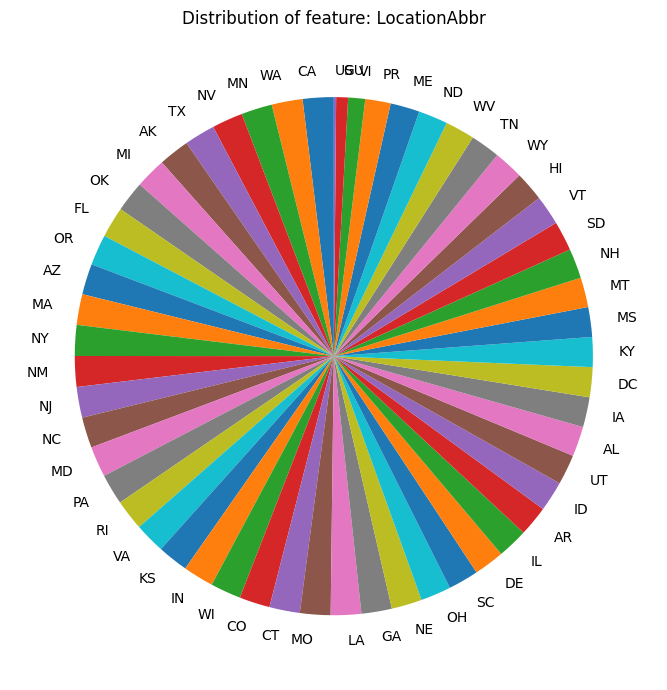

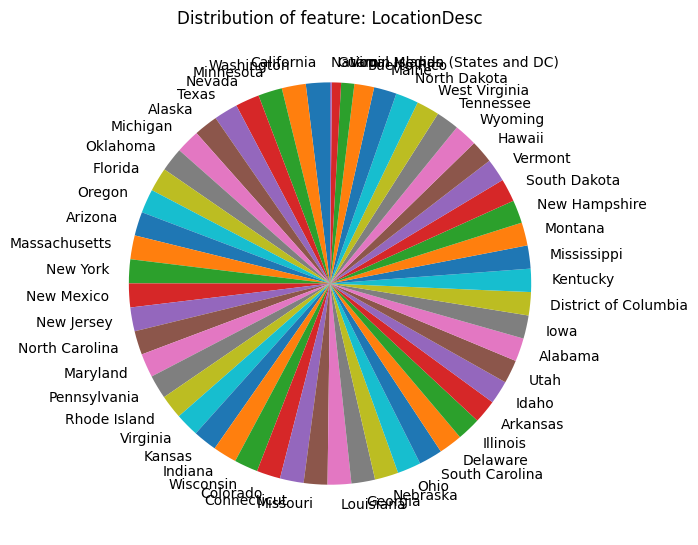

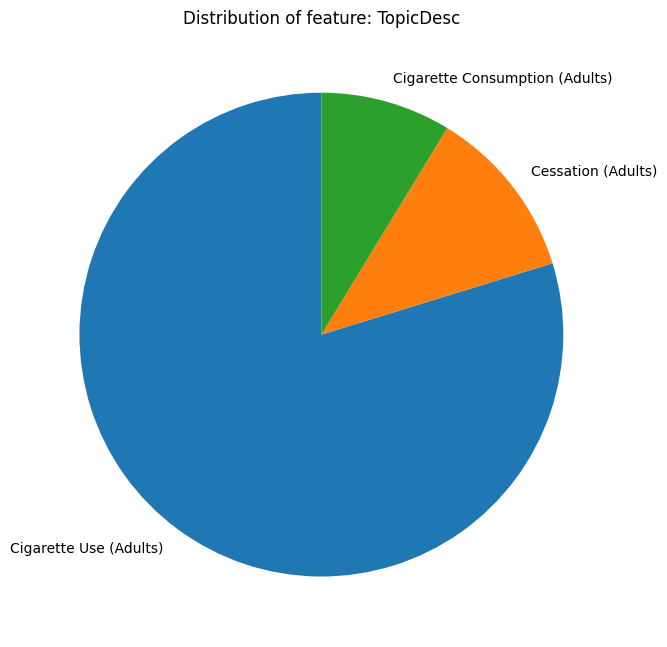

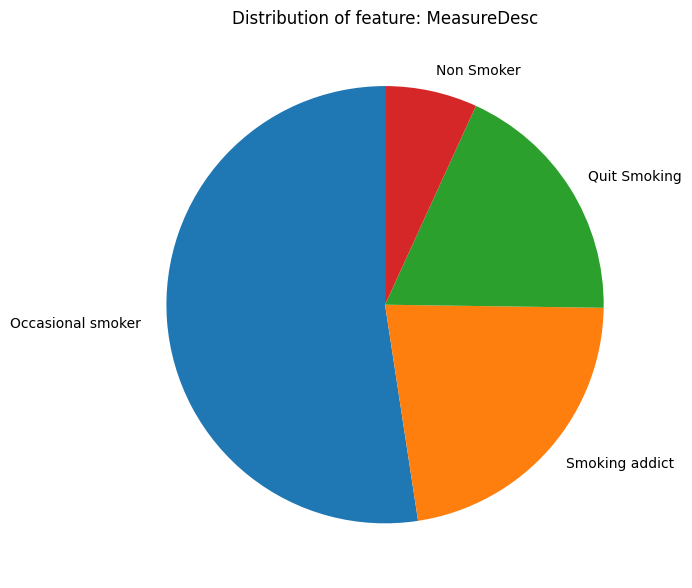

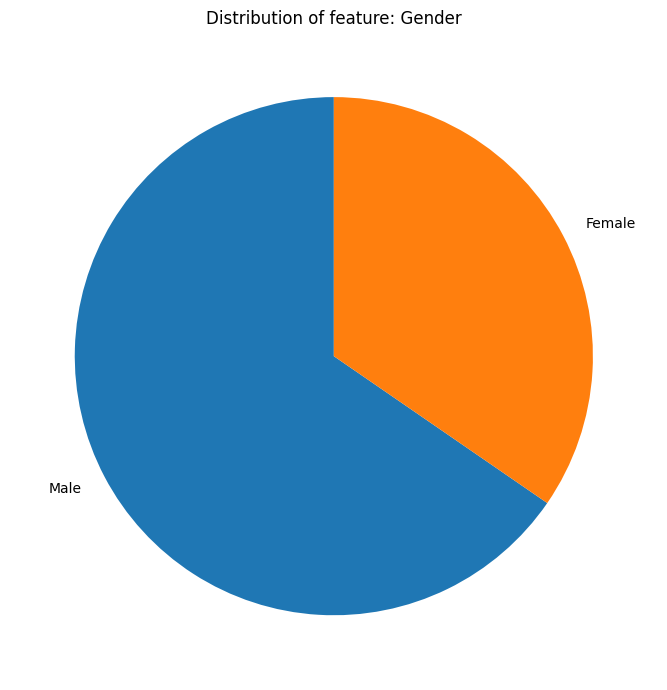

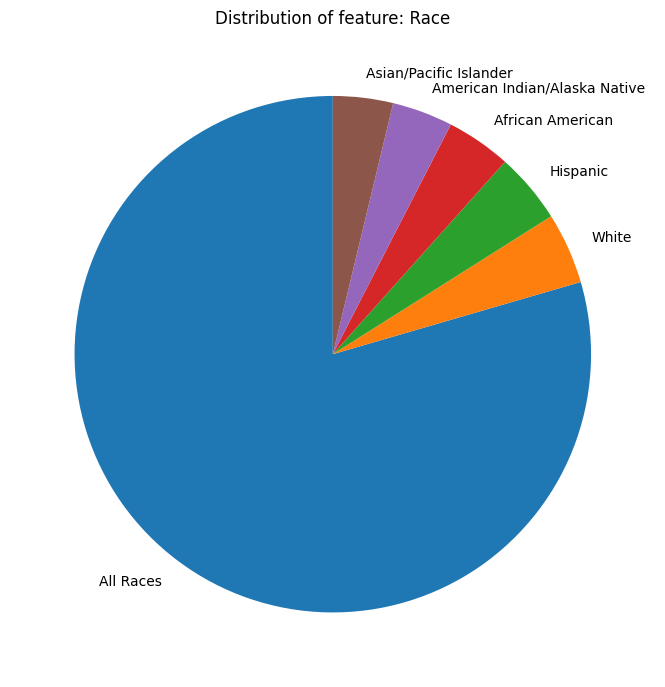

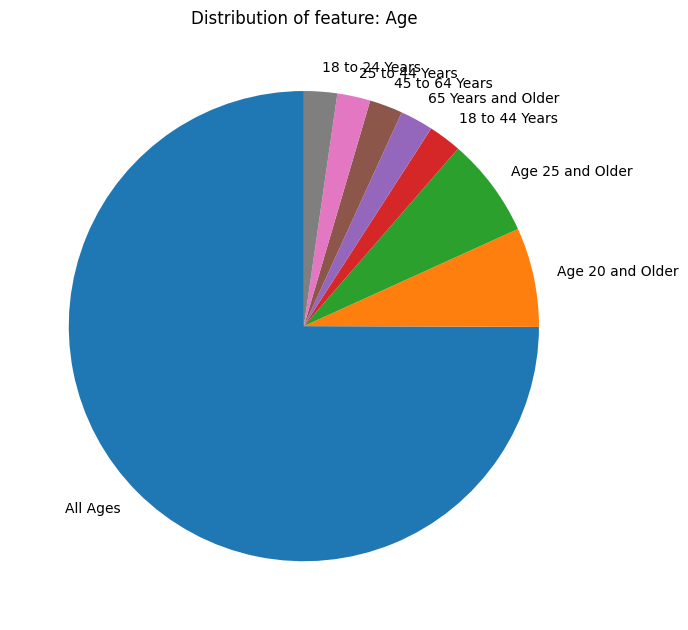

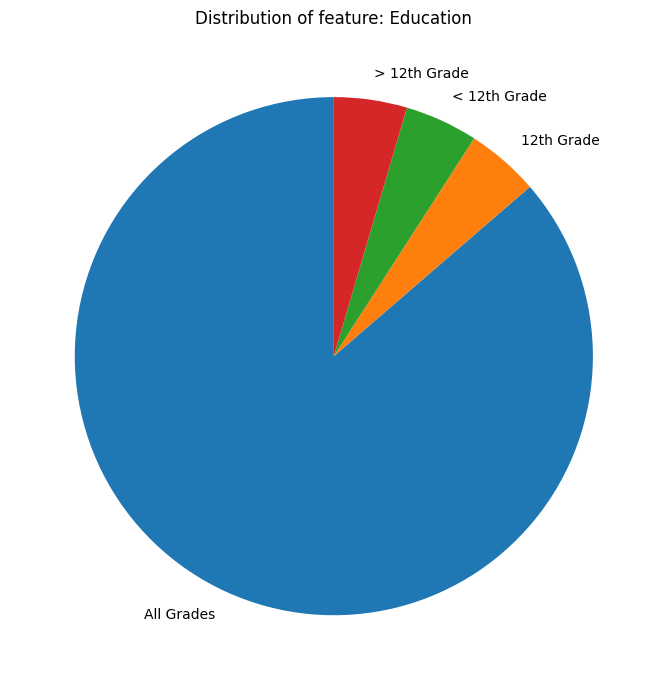

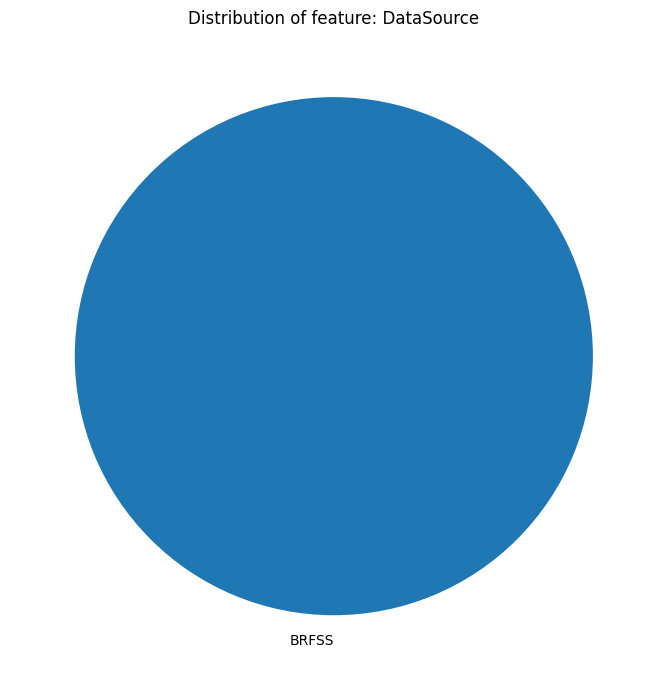

In [17]:
# Loop through all columns in the DataFrame
for column in Ctobdata.columns:
    # Check if the column is categorical (object type or categorical dtype)
    if Ctobdata[column].dtype == 'object' or Ctobdata[column].dtype.name == 'category':
        # Count the occurrences of each category in the column
        category_counts = Ctobdata[column].value_counts()

        # Create a pie chart
        plt.figure(figsize=(7, 7))
        plt.pie(category_counts, labels=category_counts.index, startangle=90)

        # Add a title
        plt.title(f'Distribution of feature: {column}')

        # Display the pie chart
        plt.tight_layout()
        plt.show()
        print("\n")

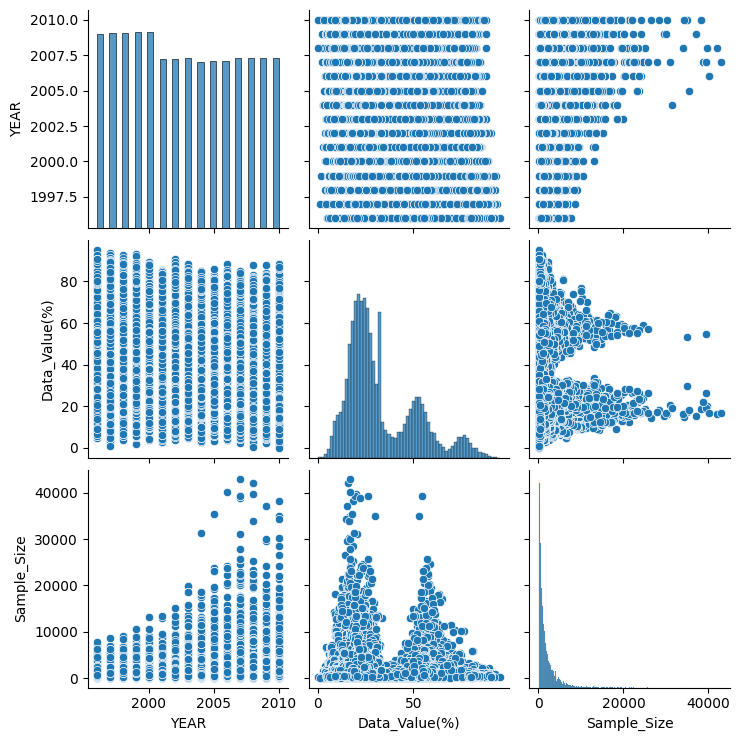

In [18]:
sns.pairplot(Ctobdata)
plt.show()

In [19]:
Ctobdata.describe(include='number').round(2).style.background_gradient()

,YEAR,Data_Value(%),Sample_Size
count,34997.000000,34997.000000,34997.000000
mean,2002.760000,33.180000,1764.450000
std,4.360000,18.140000,2460.490000
min,1996.000000,0.000000,50.000000
25%,1999.000000,20.300000,391.000000
50%,2003.000000,26.900000,988.000000
75%,2007.000000,46.500000,2076.000000
max,2010.000000,95.200000,42835.000000


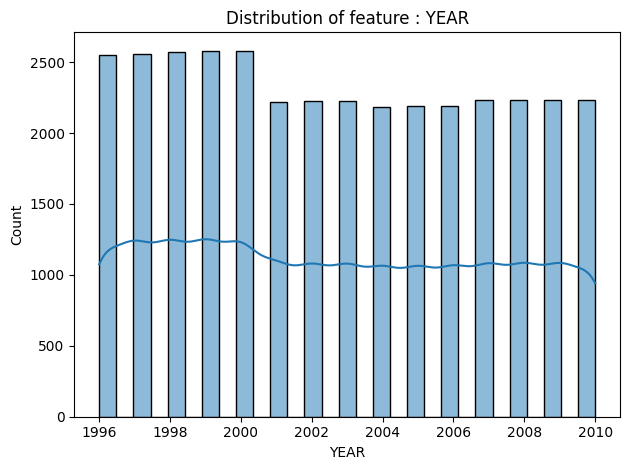

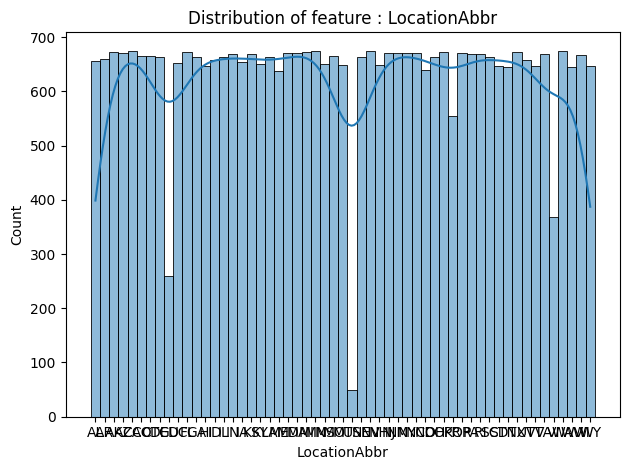

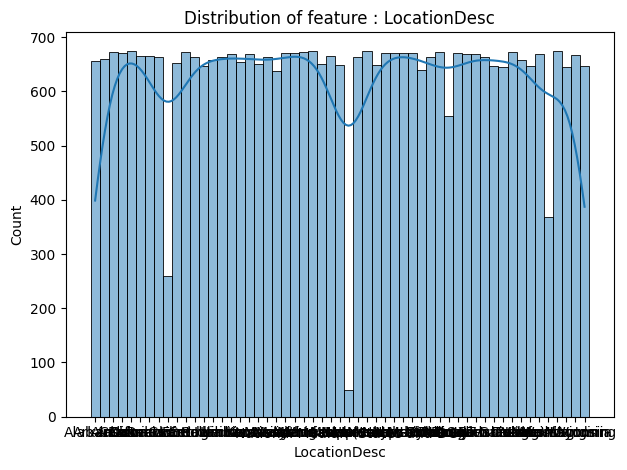

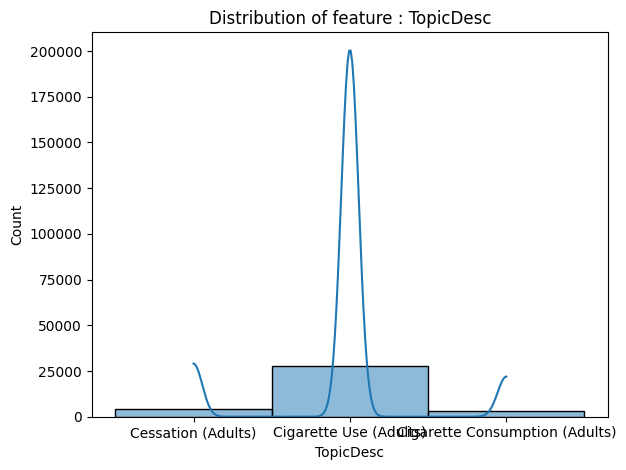

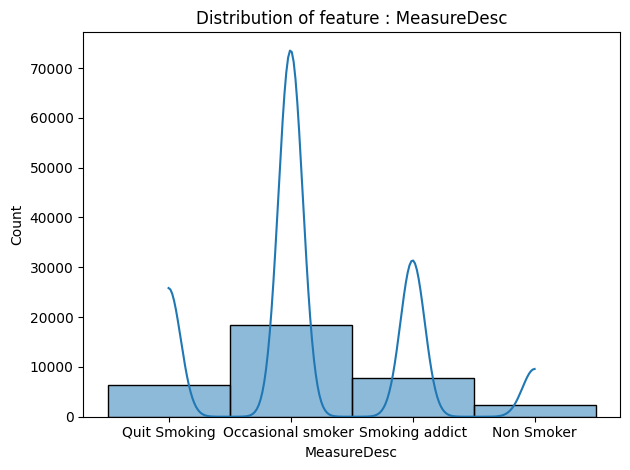

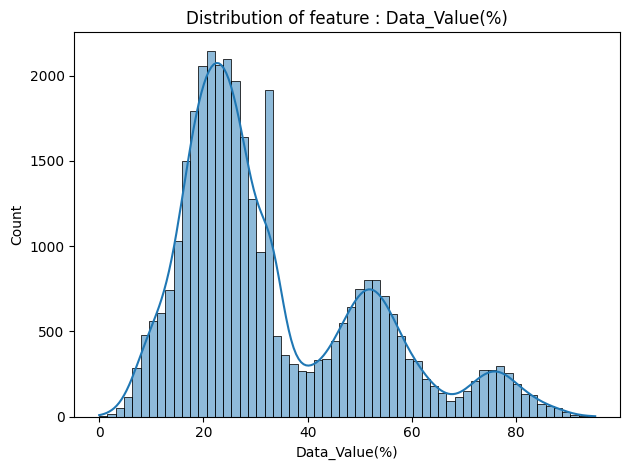

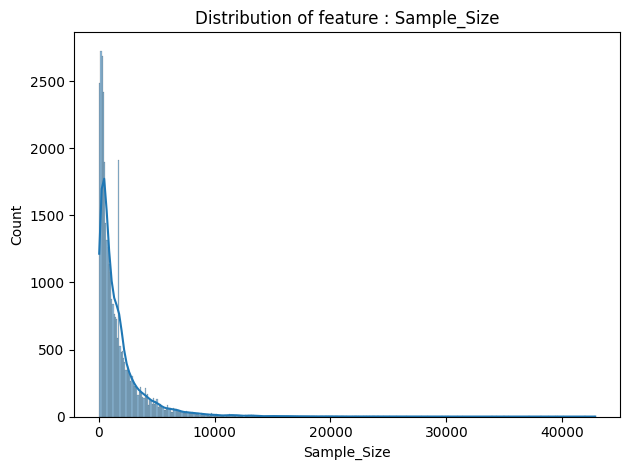

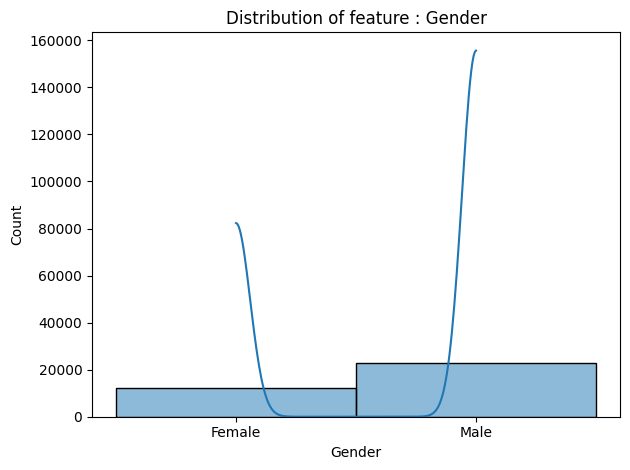

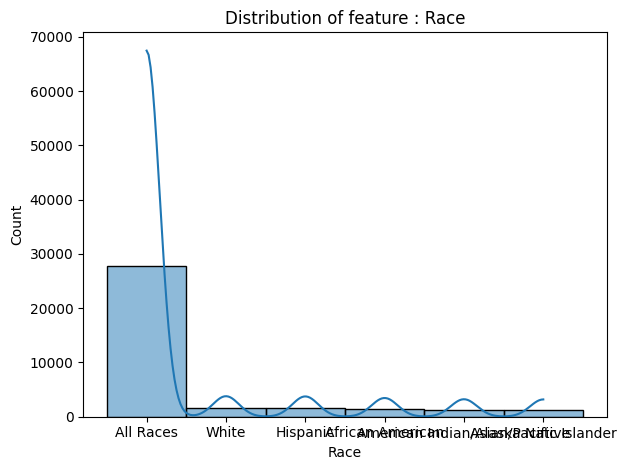

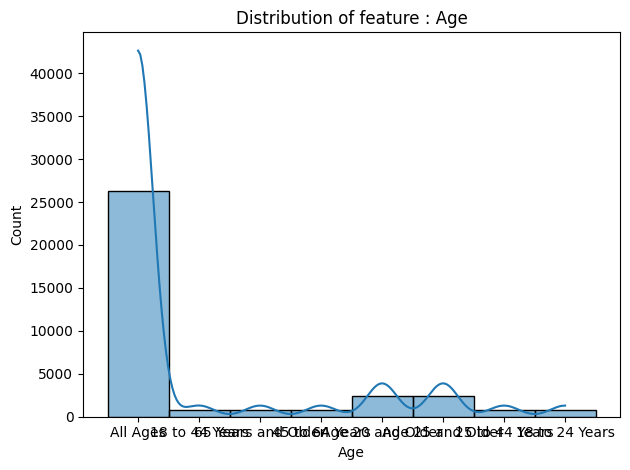

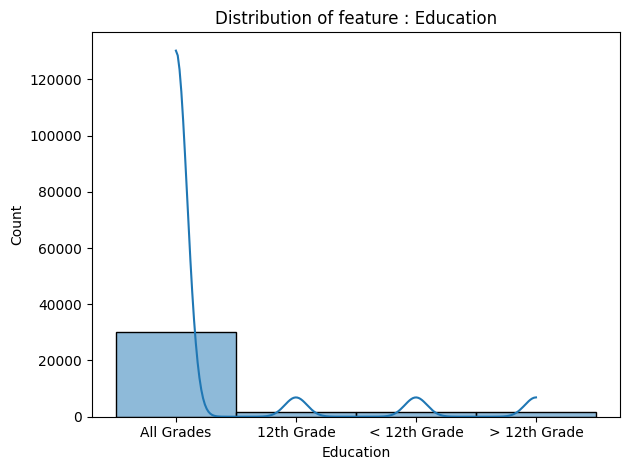

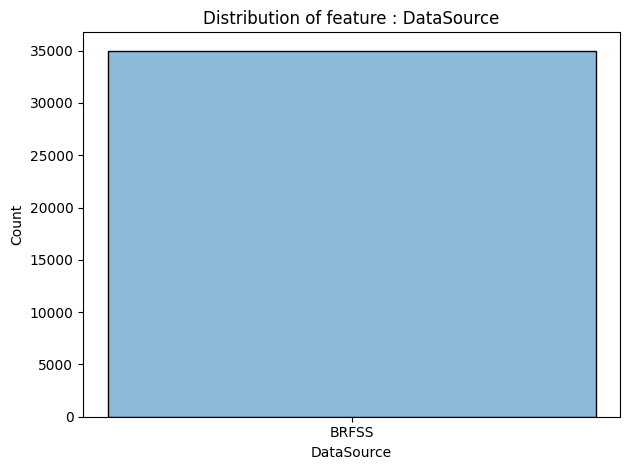

In [20]:
### to draw the histplot for every values of the columns to see distrubution of data
for column in Ctobdata.columns:
    sns.histplot(data=Ctobdata, x=column, kde=True)
    plt.title(f"Distribution of feature : {column}")
    plt.tight_layout()
    plt.show()
    print("\n")

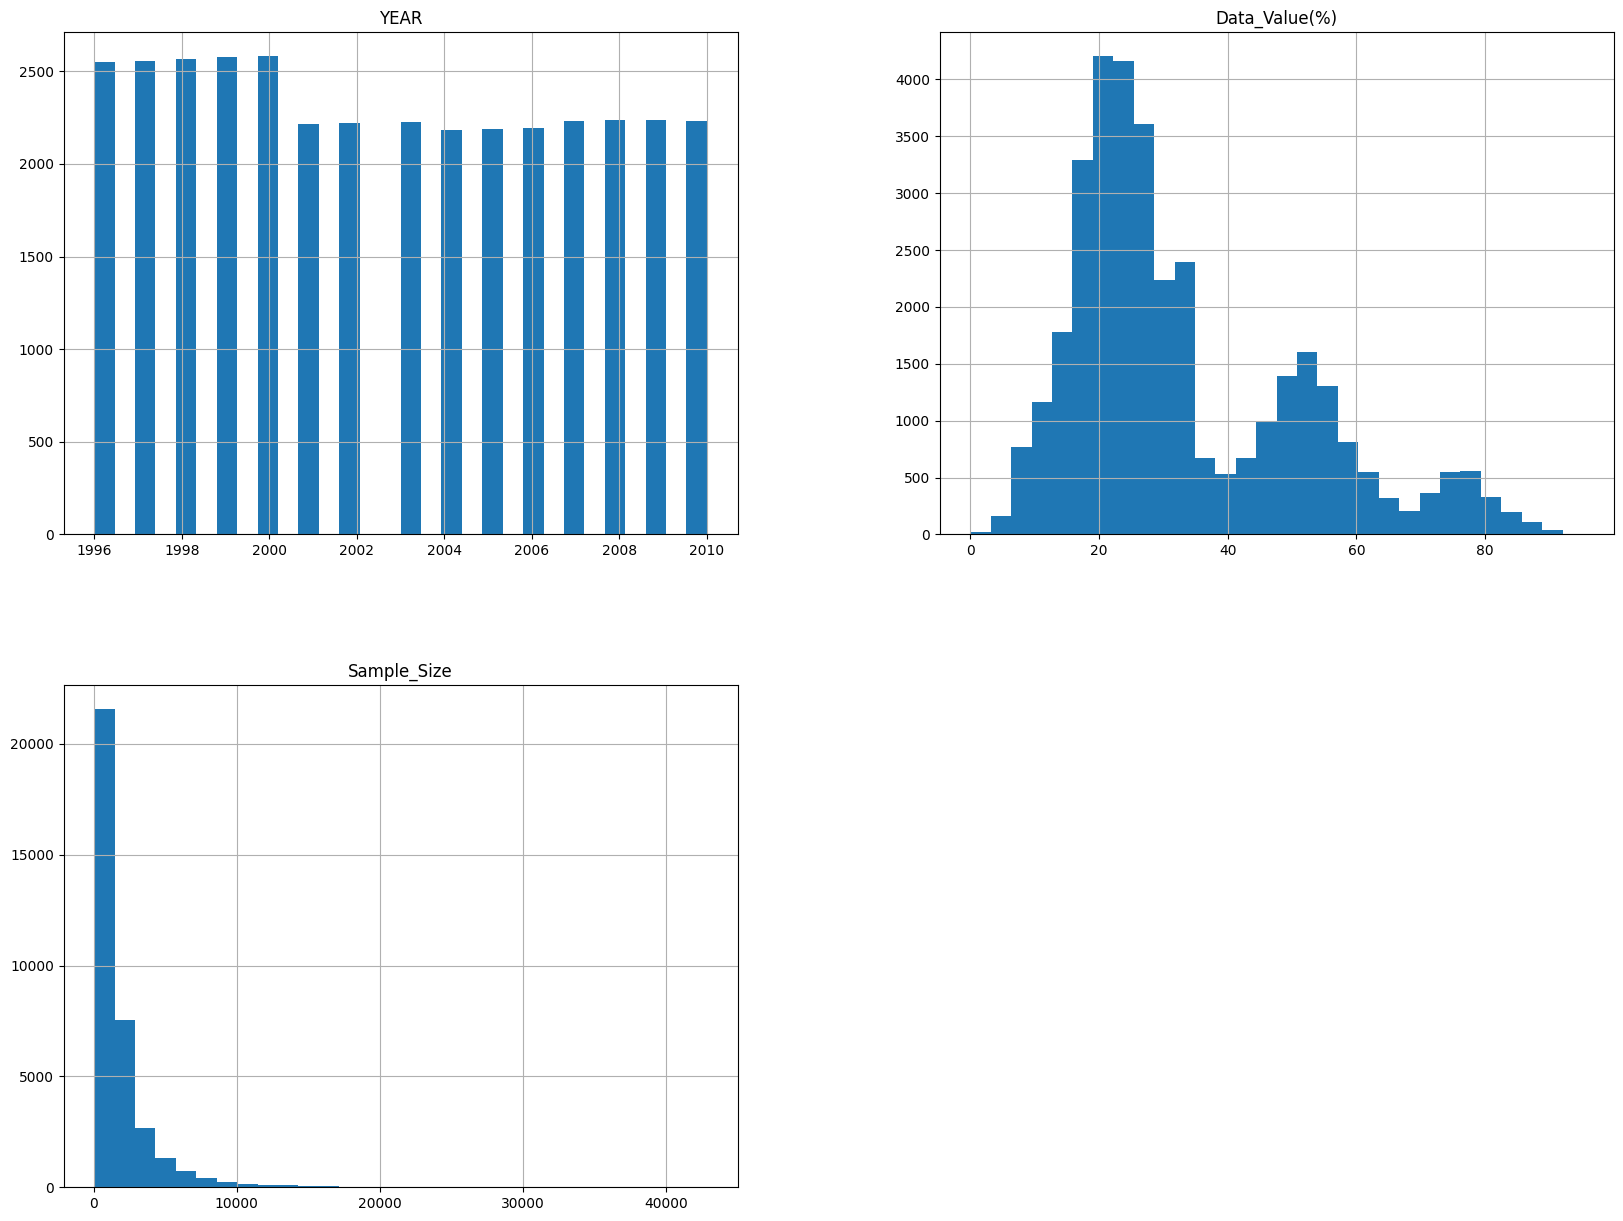

In [21]:
# To visualise the nurerical values using hisplot.
Ctobdata.hist(bins=30, figsize=(20, 15))
plt.show()

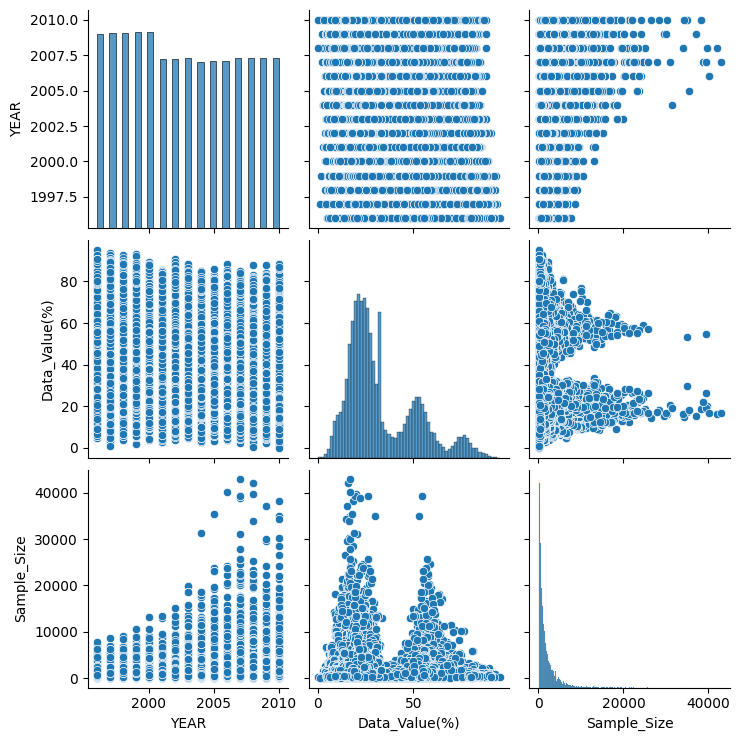

In [22]:
# To visualise the object values using pariplot.
ax = sns.pairplot(Ctobdata[Ctobdata.select_dtypes(exclude=['object']).columns])

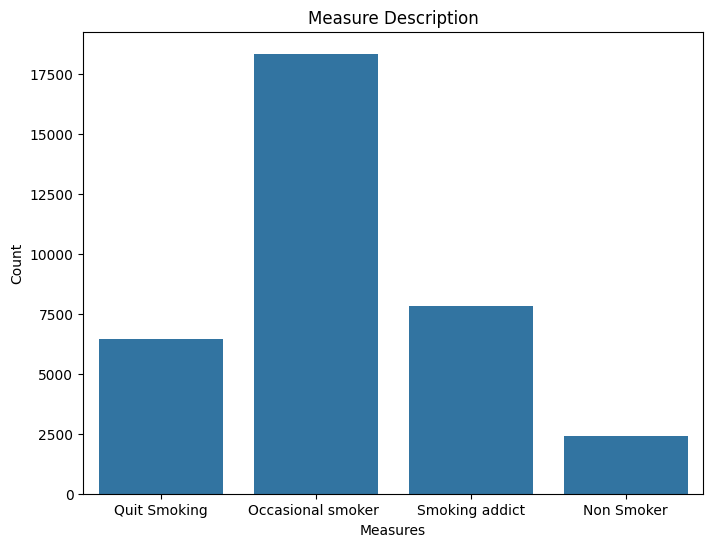

In [23]:
###To understand the target value count.
plt.figure(figsize=(8, 6))
sns.countplot(x="MeasureDesc",data=Ctobdata)
plt.title('Measure Description')
plt.xlabel('Measures')
plt.ylabel('Count')
plt.show()

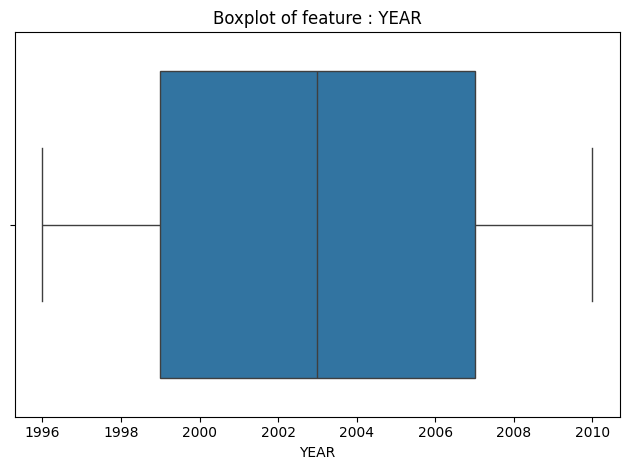

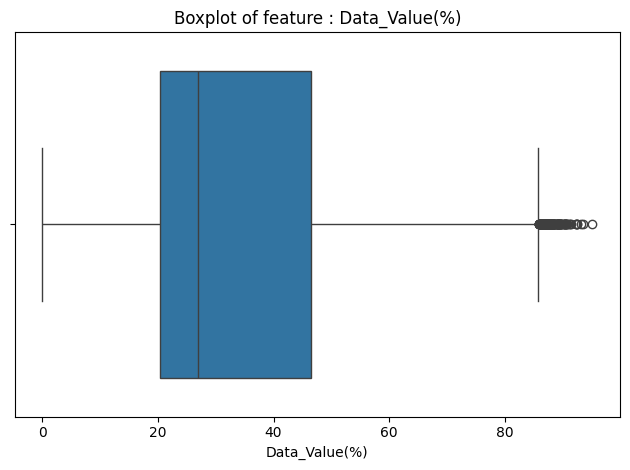

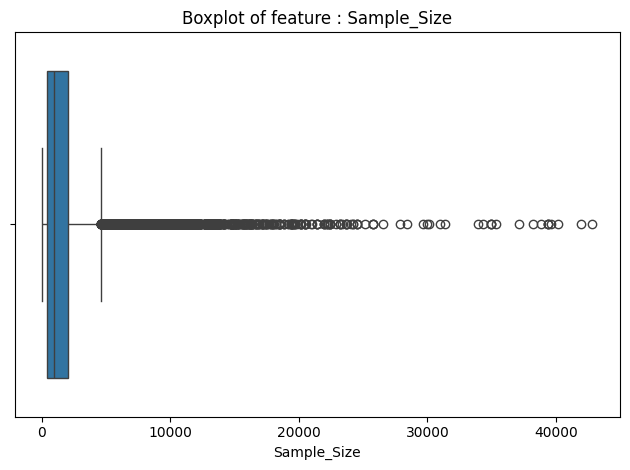

In [24]:
### Outlier detection using boxplot
for column in Ctobdata.select_dtypes(include="number").columns:
    if column == "MeasureDesc":
        continue
    sns.boxplot(data=Ctobdata, x=column)
    plt.title(f"Boxplot of feature : {column}")
    plt.tight_layout()
    plt.show()
    print("\n")

In [25]:
###Treating outliers with IQR formula
col_list = list(Ctobdata.describe().columns)
print(col_list)
for ftr in col_list:
  print(ftr,'\n')
  q_25= np.percentile(Ctobdata[ftr], 25)
  q_75 = np.percentile(Ctobdata[ftr], 75)
  iqr = q_75 - q_25
  print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q_25, q_75, iqr))
  # calculate the outlier cutoff
  cut_off = iqr * 1.5
  lower = q_25 - cut_off
  upper = q_75 + cut_off
  print(f"\nlower = {lower} and upper = {upper} \n ")
  # identify outliers
  outliers = [x for x in Ctobdata[ftr] if x < lower or x > upper]
  print('Identified outliers: %d' % len(outliers))
  #removing outliers
  if len(outliers)!=0:

    def bin(row):
      if row[ftr]> upper:
        return upper
      if row[ftr] < lower:
        return lower
      else:
        return row[ftr]



    Ctobdata[ftr] =  Ctobdata.apply (lambda row: bin(row), axis=1)
    print(f"{ftr} Outliers Removed")
  print("\n-------\n")

### The code does not remove outliers completely;it replaces outlier values with the upper or lower bounds determined by the IQR.This is a form of outlier treatment, where extreme values are "capped

['YEAR', 'Data_Value(%)', 'Sample_Size']
YEAR 

Percentiles: 25th=1999.000, 75th=2007.000, IQR=8.000

lower = 1987.0 and upper = 2019.0 
 
Identified outliers: 0

-------

Data_Value(%) 

Percentiles: 25th=20.300, 75th=46.500, IQR=26.200

lower = -18.999999999999996 and upper = 85.8 
 
Identified outliers: 148
Data_Value(%) Outliers Removed

-------

Sample_Size 

Percentiles: 25th=391.000, 75th=2076.000, IQR=1685.000

lower = -2136.5 and upper = 4603.5 
 
Identified outliers: 2901
Sample_Size Outliers Removed

-------



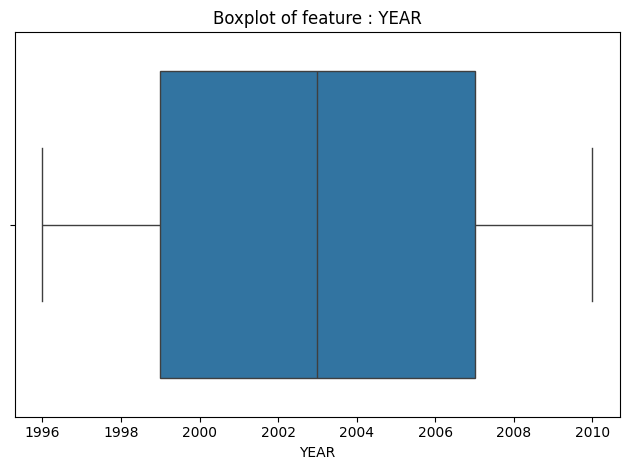

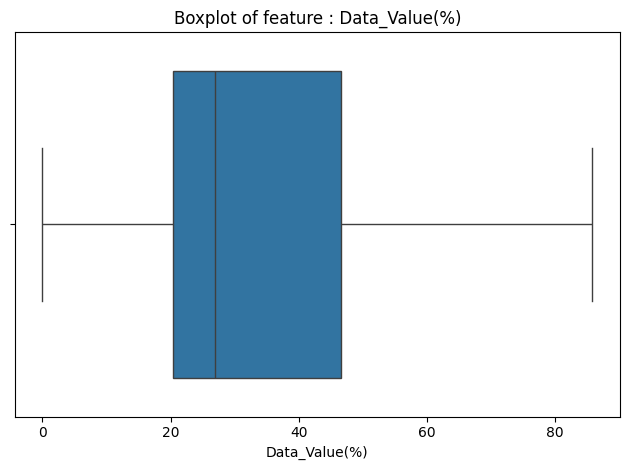

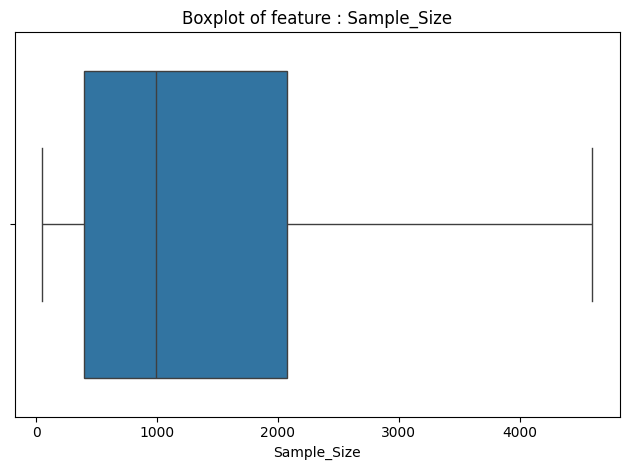

In [26]:
### Outlier detection using boxplot
for column in Ctobdata.select_dtypes(include="number").columns:
    if column == "MeasureDesc":
        continue
    sns.boxplot(data=Ctobdata, x=column)
    plt.title(f"Boxplot of feature : {column}")
    plt.tight_layout()
    plt.show()
    print("\n")

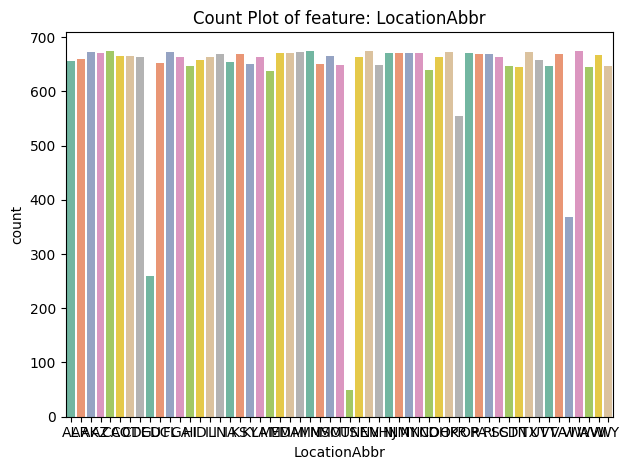

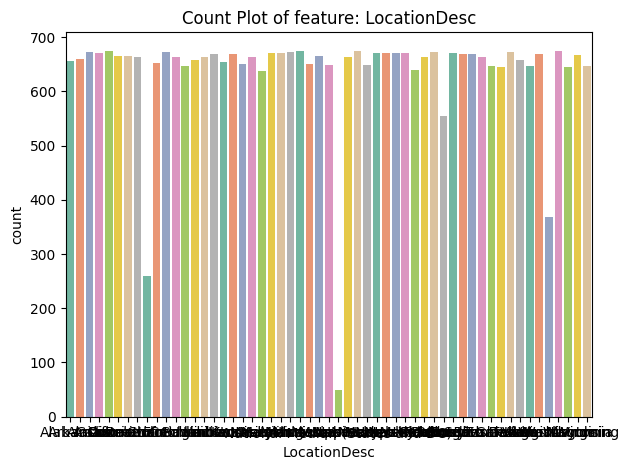

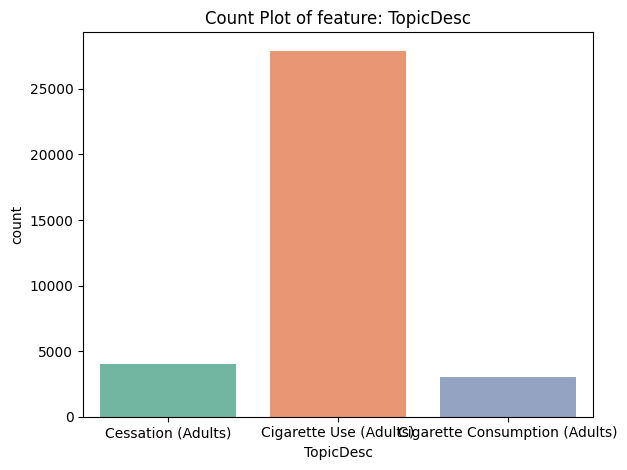

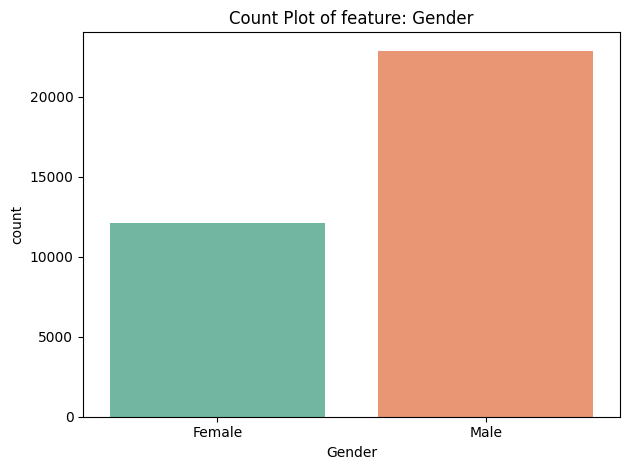

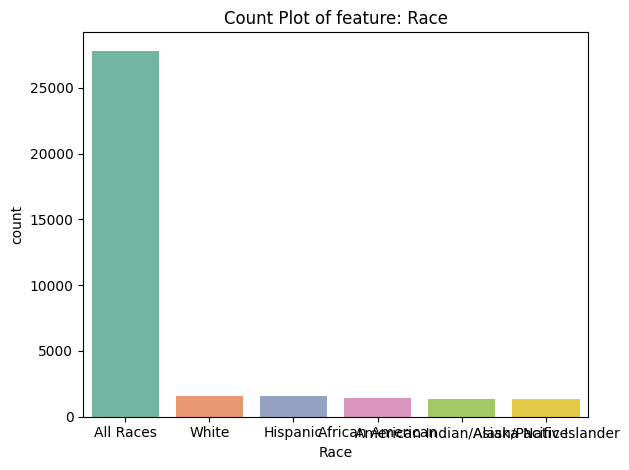

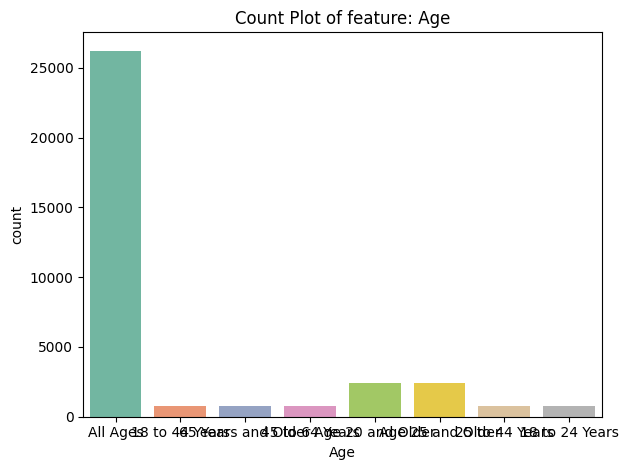

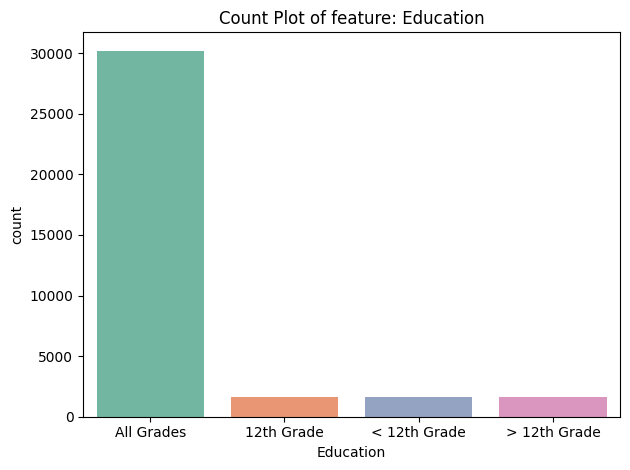

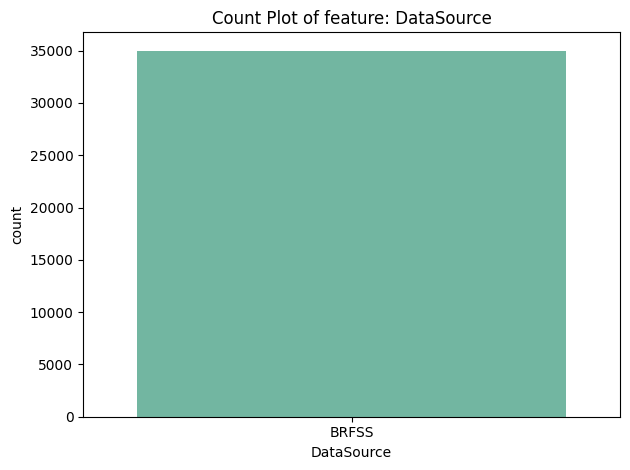

In [27]:
# Loop through all columns in the DataFrame
for column in Ctobdata.columns:
    if column == "MeasureDesc":
        continue  # Skip the "MeasureDesc" column
    
    # Check if the column is categorical (object type or categorical dtype)
    if Ctobdata[column].dtype == 'object' or Ctobdata[column].dtype.name == 'category':
        # Create a count plot with the 'hue' argument assigned to 'x' to avoid the warning
        plt.figure()
        sns.countplot(data=Ctobdata, x=column, hue=column, palette='Set2', legend=False)

        # Add a title
        plt.title(f'Count Plot of feature: {column}')
        
        # Display the plot
        plt.tight_layout()
        plt.show()
        print("\n")

In [28]:
correlation_matrix = Ctobdata.select_dtypes(include="number").corr()
correlation_matrix

,YEAR,Data_Value(%),Sample_Size
YEAR,1.000000,0.018912,0.315718
Data_Value(%),0.018912,1.000000,-0.115097
Sample_Size,0.315718,-0.115097,1.000000


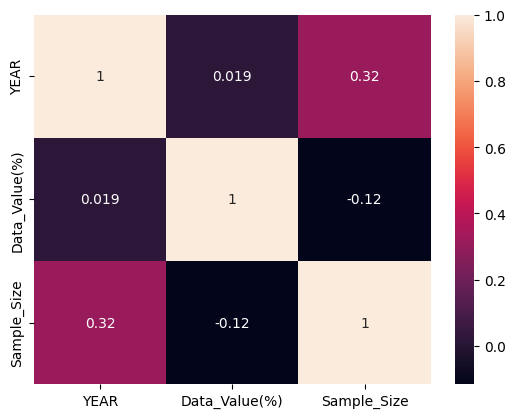

In [29]:
plt.figure()
sns.heatmap(correlation_matrix, annot=True) # draw heatmap
plt.show()

In [30]:
###Adding all object valued columns in one variable to make it easier to navigate.
columns = ['LocationAbbr', 'LocationDesc', 'TopicDesc', 'MeasureDesc', 'Gender', 'Race', 'Age', 'Education', 'DataSource'] # define categorical columns


In [31]:
encoded_tdf = pd.get_dummies(Ctobdata, columns=columns, dtype=int) # encode categorical columns
encoded_tdf

,YEAR,Data_Value(%),Sample_Size,LocationAbbr_AK,LocationAbbr_AL,LocationAbbr_AR,LocationAbbr_AZ,LocationAbbr_CA,LocationAbbr_CO,LocationAbbr_CT,...,Age_45 to 64 Years,Age_65 Years and Older,Age_Age 20 and Older,Age_Age 25 and Older,Age_All Ages,Education_12th Grade,Education_< 12th Grade,Education_> 12th Grade,Education_All Grades,DataSource_BRFSS
0,2010,53.3,659.0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
1,2010,18.7,4603.5,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
2,2010,18.6,1197.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,2010,21.5,4603.5,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
4,2010,21.8,104.0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38045,1996,54.0,207.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
38046,1996,28.2,207.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
38047,1996,20.8,516.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
38048,1996,13.9,309.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1


In [32]:
### Merged the target variable from the Ctobdata and encoded_tdf to df_concat.
df_concat = pd.concat([encoded_tdf, Ctobdata['MeasureDesc']], axis=1)
df_concat

,YEAR,Data_Value(%),Sample_Size,LocationAbbr_AK,LocationAbbr_AL,LocationAbbr_AR,LocationAbbr_AZ,LocationAbbr_CA,LocationAbbr_CO,LocationAbbr_CT,...,Age_65 Years and Older,Age_Age 20 and Older,Age_Age 25 and Older,Age_All Ages,Education_12th Grade,Education_< 12th Grade,Education_> 12th Grade,Education_All Grades,DataSource_BRFSS,MeasureDesc
0,2010,53.3,659.0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,Quit Smoking
1,2010,18.7,4603.5,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,Occasional smoker
2,2010,18.6,1197.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,Occasional smoker
3,2010,21.5,4603.5,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,Occasional smoker
4,2010,21.8,104.0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,Occasional smoker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38045,1996,54.0,207.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,Smoking addict
38046,1996,28.2,207.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,Smoking addict
38047,1996,20.8,516.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,Smoking addict
38048,1996,13.9,309.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,Smoking addict


In [33]:
###Encoding just that target column with Label Encoder for smooth process
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_concat['MeasureDesc'] = le.fit_transform(df_concat['MeasureDesc'])
df_concat['MeasureDesc']

0        2
1        1
2        1
3        1
4        1
        ..
38045    3
38046    3
38047    3
38048    3
38049    2
Name: MeasureDesc, Length: 34997, dtype: int32

In [34]:
# Define feature matrix and target variable
X = df_concat.drop(columns=['MeasureDesc'])  # Drop the target column to get only features
y = df_concat['MeasureDesc']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train\n",X_train.shape, "\nX_test",X_test.shape, "\ny_train",y_train.shape,"\n y_test" ,y_test.shape )

X_train
 (27997, 141) 
X_test (7000, 141) 
y_train (27997,) 
 y_test (7000,)


In [35]:
# Scale the selected features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [36]:
# Apply PCA to retain 95% variance
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Check the number of components
print("Number of PCA components:", X_train_pca.shape[1], "," , X_test_pca.shape[1])



Number of PCA components: 67 , 67


In [37]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Train each model and store predictions
predictions = {}
for model_name, model in models.items():
    model.fit(X_train_pca, y_train)  # Training on the selected features
    predictions[model_name] = model.predict(X_test_pca)  # Store predictions for later evaluation


In [38]:
###Use Regression Models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector Regressor': SVR()
}


In [39]:
###Evaluate Using Regression Metrics
##For regression tasks, you would evaluate models using metrics like Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R² score.
###Here’s how you could calculate these metrics for each regression model:
results = []


for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        'Model': model_name,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2 Score': r2
    })

# Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(results)
print("Evaluation Metrics for Each Model:")
print(results_df)

Evaluation Metrics for Each Model:
                      Model           MSE          RMSE           MAE  \
0         Linear Regression  6.831281e-28  2.613672e-14  2.111944e-14   
1             Decision Tree  0.000000e+00  0.000000e+00  0.000000e+00   
2             Random Forest  0.000000e+00  0.000000e+00  0.000000e+00   
3  Support Vector Regressor  6.573908e-01  8.107964e-01  5.805292e-01   

   R2 Score  
0  1.000000  
1  1.000000  
2  1.000000  
3  0.199539  


Based on the evaluation metrics provided, here is a summary of the performance of each model:

1. Linear Regression
MSE (Mean Squared Error): 
6.83
×
1
0
−
28
6.83×10 
−28
  (extremely low, near zero)
RMSE (Root Mean Squared Error): 
2.61
×
1
0
−
14
2.61×10 
−14
  (very low)
MAE (Mean Absolute Error): 
2.11
×
1
0
−
14
2.11×10 
−14
  (minimal error)
R² Score: 
1.000
1.000 (perfect fit)
Performance: The model shows an almost perfect fit with negligible error. This might indicate overfitting, depending on the complexity of the data.
2. Decision Tree
MSE, RMSE, MAE: 
0.0
0.0 (no error)
R² Score: 
1.000
1.000 (perfect fit)
Performance: The model perfectly predicts the outcomes, which could be a sign of overfitting, especially for small datasets or if no cross-validation was applied.
3. Random Forest
MSE, RMSE, MAE: 
0.0
0.0 (no error)
R² Score: 
1.000
1.000 (perfect fit)
Performance: Similar to the Decision Tree, the Random Forest provides a perfect prediction, suggesting potential overfitting if the evaluation is based on training data.
4. Support Vector Regressor (SVR)
MSE: 
0.657
0.657
RMSE: 
0.811
0.811
MAE: 
0.581
0.581
R² Score: 
0.200
0.200
Performance: The SVR underperforms compared to other models, with relatively high errors and a low R² score, indicating it is not capturing the data's variance well.
Observations:
Overfitting Concern: The perfect scores of Decision Tree and Random Forest models suggest overfitting, especially if these metrics are computed on training data rather than an unseen validation/test dataset.
SVR Performance: It seems unsuitable for this dataset, as indicated by its low R² score and high error metrics.
Linear Regression: While it shows strong performance, further validation on unseen data is necessary to confirm its reliability.
Recommendations:
Evaluate all models on a test dataset or using cross-validation to verify the results.
For Decision Tree and Random Forest, adjust hyperparameters (e.g., max_depth) to mitigate overfitting.
Consider additional preprocessing or feature engineering to improve SVR performance.

In [41]:
from sklearn.model_selection import GridSearchCV

# Decision Tree with Hyperparameter Tuning
dt_model = DecisionTreeRegressor(random_state=42)
dt_params = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
dt_grid = GridSearchCV(estimator=dt_model, param_grid=dt_params, cv=5, scoring='r2')
dt_grid.fit(X_train, y_train)
best_dt_model = dt_grid.best_estimator_


In [42]:
# Evaluate Decision Tree on Test Set
dt_predictions = best_dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_rmse = dt_mse ** 0.5
dt_mae = mean_absolute_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)

print("Decision Tree - Test Set Metrics:")
print(f"MSE: {dt_mse}, RMSE: {dt_rmse}, MAE: {dt_mae}, R2 Score: {dt_r2}")



Decision Tree - Test Set Metrics:
MSE: 0.0, RMSE: 0.0, MAE: 0.0, R2 Score: 1.0


Here's a breakdown:

MSE (Mean Squared Error): 0.0 means the average squared difference between the actual and predicted values is zero. This is ideal, suggesting perfect predictions.
RMSE (Root Mean Squared Error): 0.0 indicates that the standard deviation of the residuals (errors) is zero. Again, this implies perfect predictions with no deviation.
MAE (Mean Absolute Error): 0.0 signifies that the average absolute difference between the actual and predicted values is zero. This further confirms perfect predictions.
R-squared Score: 1.0: An R-squared score of 1.0 means that the model explains 100% of the variance in the target variable. This is the highest possible score, indicating a perfect fit.
Possible Reasons for Perfect Scores:

Overfitting: The model might be overfitting to the training data. It has learned the training data too well and may not generalize well to unseen data.
Data Issues:
Data Leakage: Information from the test set might have inadvertently influenced the training process.
Data Errors: There might be inconsistencies or errors in the data that are not being properly handled.
Trivial Problem: The problem itself might be very simple, and the decision tree model can easily capture the underlying patterns.
Recommendations:

Inspect the Data: Carefully examine the training and test data for any anomalies, inconsistencies, or potential data leakage.
Cross-validation: Use techniques like k-fold cross-validation to get a more robust estimate of the model's performance.
Hyperparameter Tuning: Experiment with different hyperparameters for the decision tree model (e.g., max_depth, min_samples_split, min_samples_leaf) to prevent overfitting.
Consider Other Models: Try other regression models (e.g., Linear Regression, Random Forest, XGBoost) to see if they achieve similar or better results.
Caution:

While perfect scores on the test set might seem ideal, they often indicate potential issues. It's crucial to investigate further and ensure that the model generalizes well to new, unseen data.

In [47]:
pip install -U scikit-learn 


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error

# ... (your code for data loading, preprocessing, model training, prediction) ...

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred) 
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print metrics
print("Decision Tree - Test Set Metrics:")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2 Score: {r2}")

Decision Tree - Test Set Metrics:
MSE: 0.6573907985388255
RMSE: 0.8107963977095763
MAE: 0.5805291678635023
R2 Score: 0.19953874221503454
